# Функция кластеризации районов 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm


import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as pyo
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans

In [ ]:
df = pd.read_excel('Выборка_Казань.xlsx', sheet_name = 0)
df

In [ ]:
df = df[df['Мусор'] == 0]
df = df[df['outlier'] == 0]
df = df[df['dup'] == 0]
df.reset_index(drop = True , inplace = True )
df

In [459]:
def compact_district(dataf, target, district, random_state = 42, k = 8, figsize = (15, 5)):
    """
    dataf - DataFrame, из которого используются данные 
    target - столбец с ценой за кв.м.  
    district - столбец с районами города
    random_state - параметр, фиксирующий случайность, задан по умолчанию = 42 
    k - количество кластеров (укрупненных районов), задается вручную
    figsize - размер графиков, задан по умолчанию (15, 5)
    """
    sort_dist_med = dataf.groupby(district)[target].agg(['median']).round().sort_values('median', ascending = False)   #группируем районы по медианной цене, округл и сорт
    
    kmeans = KMeans(n_clusters = k, random_state = random_state)                                                       #объявляем kmeans
    kmeans.fit(sort_dist_med[['median']])                                                                              #обучаем kmeans

    sort_dist_med['Районы_Kmeans'] = kmeans.labels_
    sort_dist_med = sort_dist_med.sort_values('median', ascending = False)                                             #передаем сортированные метки в df

    mapping = {}                                                                                                       #создаем словарь для меток
    current_label = k 

    for i, row in sort_dist_med.iterrows():                                                                            #цикл,упорядочивающий метки по убыванию медианной цены                                                                 
        if row['Районы_Kmeans'] not in mapping:
            mapping[row['Районы_Kmeans']] = current_label
            current_label -= 1

    sort_dist_med['Районы_Kmeans'] = sort_dist_med['Районы_Kmeans'].map(mapping)
    
    table_comp = sort_dist_med.groupby('Районы_Kmeans')['median'].agg(['min', 'max'])                                  #выводим df с кластерами, и мин и макс медианами для кластера
    table_comp.columns = ['median_min', 'median_max']
    table_comp['Прирост_med'] = table_comp['median_max'].pct_change() 
    table_comp['Районы_2'] = sort_dist_med.groupby('Районы_Kmeans').apply(lambda x: list(x.index))                     #добавляем в df столбец со списком рай-нов в кластере
    pd.set_option('display.max_colwidth', None)                                                                        #показываем всю ширину столбца
    
    
    fig, ax = plt.subplots(1, 2, figsize = figsize)                                                                    #строим два графика в одном окне
    
    sns.scatterplot(                                                                                                   #строим точечную диаграмму
                    data = sort_dist_med, 
                    x = 'median', 
                    y = [0]*len(sort_dist_med),                                                                        #все точки будут лежать на 0 по оси y
                    hue = 'Районы_Kmeans', 
                    s = 100, 
                    palette = 'Reds',
                    ax = ax[0]                                                                                         #помещаем в 1 столбец окна
                   )
    
    ax[0].set_xlabel('Медианная_цена')
    ax[0].set_label('Районы_2')
    
    sns.boxplot(                                                                                                       #строим boxplot
                data = sort_dist_med,
                x = 'Районы_Kmeans', 
                y = 'median',     
                palette = 'Reds',
                ax = ax[1]                                                                                             #помещаем в 2 столбец окна
               )
    
    #ax[1].set_xlabel('Медианная_цена')
    #ax[1].set_label('Районы_2')
    ax[0].get_legend().remove()     #отключаем легенду у площади
    #ax[1].get_legend().remove()     #отключаем легенду у ГП
    
    fig.suptitle(f'Распределение районов по кластерам (k = {k})')                                                      #подпись к 2 графикам

    return sort_dist_med, table_comp, plt.show

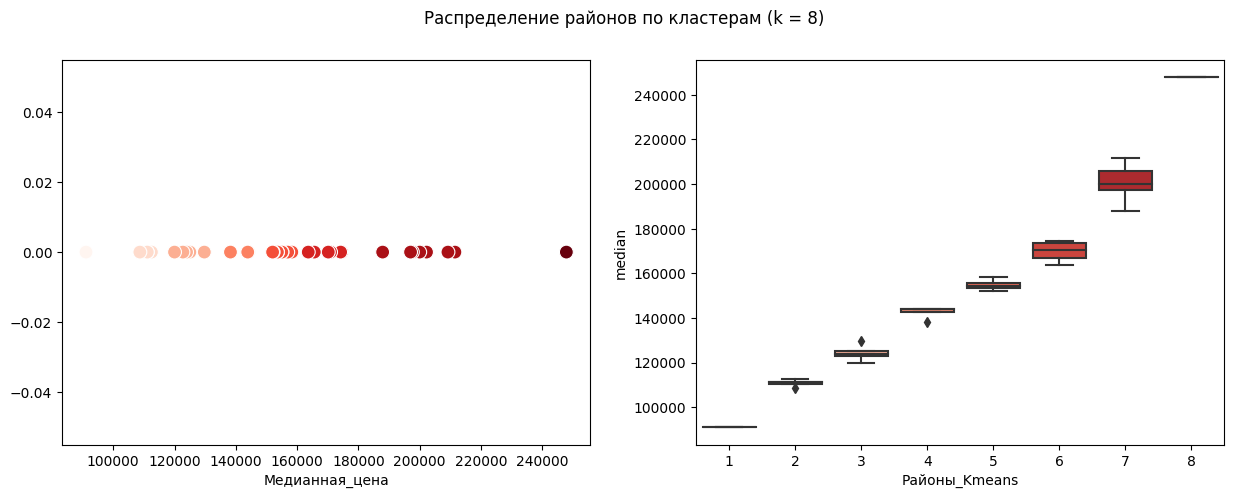

In [460]:
tab_1, tab_2, _ = compact_district(
                                   dataf = df, 
                                   target = 'Цена(кв.м)',
                                   district = 'Районы_2',
                                   random_state = 42,
                                   k = 8,
                                   figsize = (15, 5)
                                  )

In [461]:
tab_1

,median,Районы_Kmeans
Районы_2,,
Центр,247857.0,8
Квартал_56_Третий,211490.0,7
Старотатарская_Суконная,209217.0,7
Калуга_Аметьево,202224.0,7
Клыковка_Дальний,200000.0,7
Зоопарк,197607.0,7
Ягодная_слобода,197018.0,7
Речной_Порт,187908.0,7
Городские_поселки,174516.0,6


In [462]:
tab_2

,median_min,median_max,Прирост_med,Районы_2
Районы_Kmeans,,,,
1,91108.0,91108.0,NaN,[Куюки]
2,108687.0,112453.0,0.234282,"[Левченко, Красная_горка_Юдино, Залесный, Высокая_гора]"
3,120000.0,129719.0,0.153540,"[Сокуры, Дербышки, Царево, Жилплощадка_Новое_Караваево, Осиново]"
4,138252.0,144068.0,0.110616,"[поселок_Урицкого, Караваево, Пороховая_слобода, Свердлова]"
5,151999.0,158268.0,0.098565,"[Усады, Горки, Кварталы, Левый_Берег, Соцгород, Квартал_42, Старый_Ново_Савиновский, Азино]"
6,163636.0,174516.0,0.102661,"[Городские_поселки, Вблизи_центра, Царицыно, Солнечный_Город, Адмиралтейская_слобода, Танкодром]"
7,187908.0,211490.0,0.211866,"[Квартал_56_Третий, Старотатарская_Суконная, Калуга_Аметьево, Клыковка_Дальний, Зоопарк, Ягодная_слобода, Речной_Порт]"
8,247857.0,247857.0,0.171956,[Центр]


# Код для для разметки Районов_KMeans в df

In [ ]:
# Добавляем в наш df столбец со значениями Районов_KMeans из df_1
mapping = dict(zip(df_1.index, df_1['Районы_Kmeans']))  # Делаем словарь, который сопоставляет Районы_2 (это индекс!) и Районы_Kmeans в df_1
df['Районы_Kmeans_1'] = df['Районы_2'].apply(lambda x: mapping.get(x))  # добавляем столбец в df
df

# Код для графика зависимости цены от площади

In [ ]:
grid = sns.lmplot(x = "ОПлощадь", 
                  y = "Цена", 
                  col = "Районы_5",
                  sharex = False, 
                  col_wrap = 4, 
                  data = df, 
                  height = 4
                  #line_kws = {'color': 'red'}                  #меняет цвет линии на красный, но оно не работает
                 )
                  
x_min = df['ОПлощадь'].min()                                    #задаем минимумы и максимумы для осей x и y - все графики будут в одном масштабе
x_max = df['ОПлощадь'].max()
y_min = df['Цена'].min()
y_max = df['Цена'].max()

grid.set(xlim = (x_min, x_max), ylim = (y_min, y_max))